In [1]:
import shap
import joblib

rf = joblib.load("C:/Users/pralo/AI-marketing-optimization/models/rf_mmm_model.pkl")
x_test = joblib.load("C:/Users/pralo/AI-marketing-optimization/models/x_test_mmm_model.pkl")

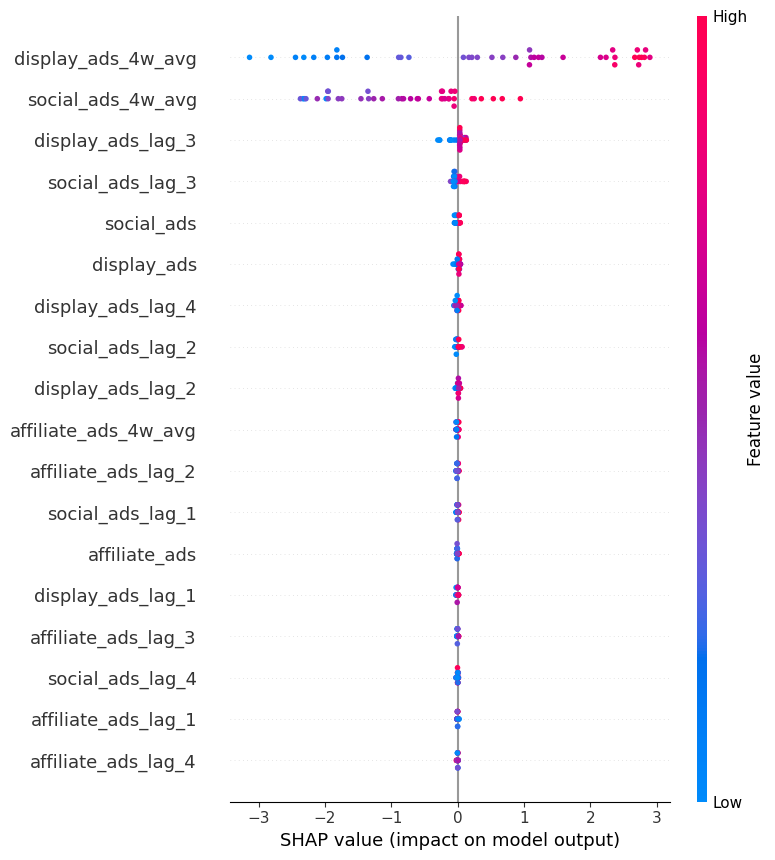

In [2]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

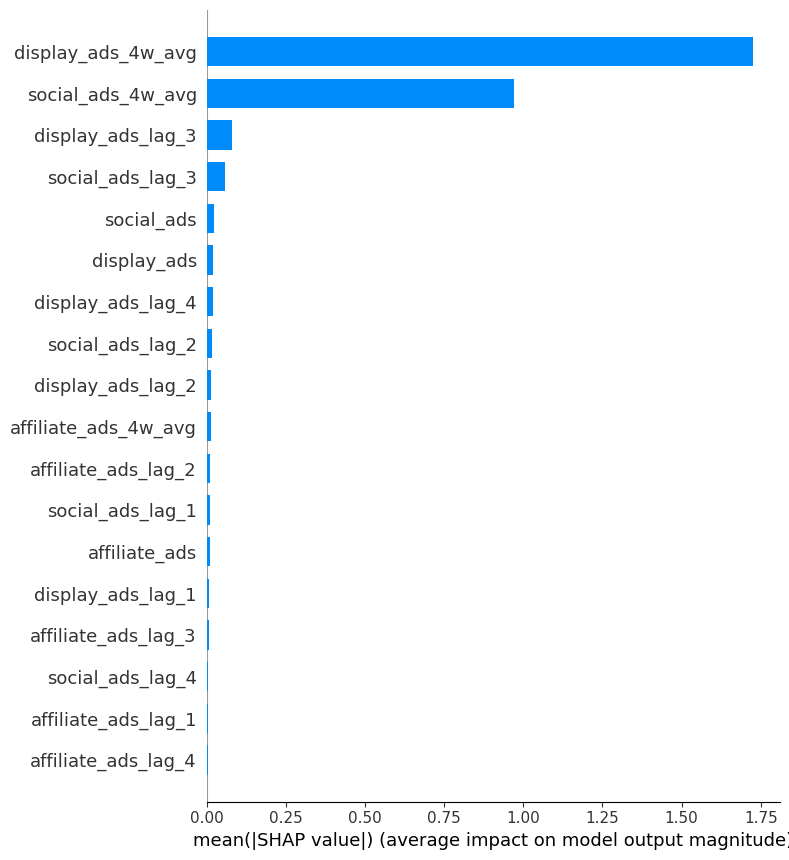

In [3]:
shap.summary_plot(shap_values, x_test, plot_type = "bar")

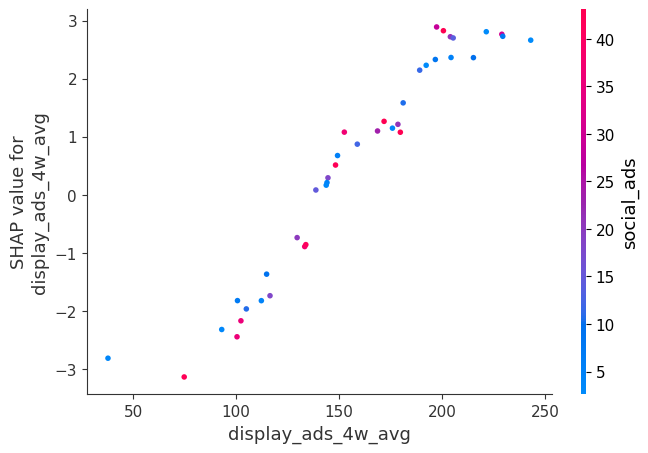

In [4]:
shap.dependence_plot("display_ads_4w_avg", shap_values, x_test)

In [6]:
import pandas as pd
import numpy as np

shap_df = pd.DataFrame(
    shap_values,
    columns=x_test.columns
)


In [7]:
channel_map = {
    "display": [c for c in shap_df.columns if c.startswith("display_ads")],
    "social": [c for c in shap_df.columns if c.startswith("social_ads")],
    "affiliate": [c for c in shap_df.columns if c.startswith("affiliate_ads")]
}


In [8]:
channel_contrib = pd.DataFrame()

for channel, cols in channel_map.items():
    channel_contrib[channel] = shap_df[cols].sum(axis=1)


In [11]:
avg_channel_contrib = channel_contrib.abs().mean().sort_values(ascending=False)
avg_channel_contrib


display      1.757006
social       1.006186
affiliate    0.028977
dtype: float64

In [12]:
percent_contrib = (
    avg_channel_contrib / avg_channel_contrib.sum()
) * 100

percent_contrib


display      62.926224
social       36.035994
affiliate     1.037783
dtype: float64

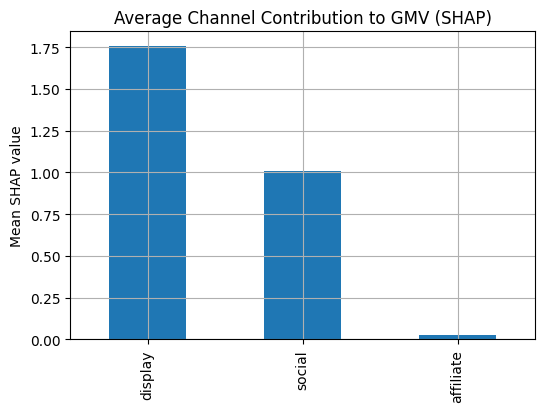

In [13]:
import matplotlib.pyplot as plt

avg_channel_contrib.plot(kind="bar", figsize=(6,4))
plt.title("Average Channel Contribution to GMV (SHAP)")
plt.ylabel("Mean SHAP value")
plt.grid(True)
plt.show()


conclusion

Channel-level SHAP aggregation shows that display and social advertising are the dominant drivers of GMV. While social media exhibits a negative average marginal effect at higher spend levels, its overall contribution magnitude remains significant, indicating saturation effects rather than lack of influence.